<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/practice_final/Supply_Shocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Imports** { display-mode: "form" }
import jax 
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
from functools import partial 
from functools import partial 
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Prompt**:
Please write down a model that provides some insight about which types of firms might increase their production in the US in response to the Pandemic

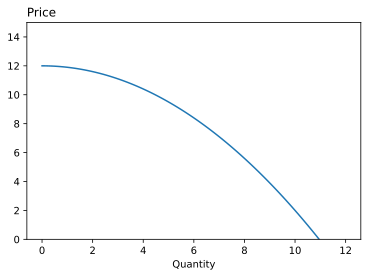

In [2]:
#@title **Demand Function** { display-mode: "form" }
def inverse_demand_fn(q):
  price = 12. - 0.1*q**2
  return price 

qs = jnp.linspace(0, 12, 100)                             # Vector of quantities 
vector_inverse_demand_fn = jax.vmap(inverse_demand_fn)    # Vectorize the inverse demand function
ps = vector_inverse_demand_fn(qs)                         # Vector of Prices 
plt.plot(qs, ps)                                          # Plot the graph 
plt.title('Price', loc='left')                            # Title
plt.xlabel('Quantity')                                    # Lable the X-axis
plt.ylim(0., 15.)                                         # Restrict graph to non-negative prices
plt.show()                                                # Show the graph

In [3]:
#@title **Revenue, Cost, Profit** { display-mode: "form" }
def revenue_fn(q):
  return inverse_demand_fn(q)*q 

def cost_fn(q, foreign=0.0): 
  """
  - We allow the marginal cost to depend on the location (foreign)
  """
  return 2.0 + (1*(1-foreign) + 0.5)*q **2 
  
def profit(q, foreign=0.0):
  """
  - We allow the profit function to depend on the location
  """
  return revenue_fn(q) - cost_fn(q, foreign)

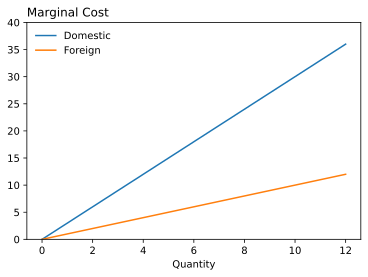

In [4]:
#@title **Plot Marginal Cost** { display-mode: "form" }
labels = ['Domestic', 'Foreign']
qs = jnp.linspace(0, 12, 100)                             # Vector of quantities 
for j in [0, 1]:                                          # A for loop allows us to repreat the same procedure for different values!
  margina_cost_fn = jax.grad(partial(cost_fn, foreign=j)) # Grad of the partially evaluated function
  vector_marginal_cost_fn = jax.vmap(margina_cost_fn)     # Vectorize the marginal cost function
  ps = vector_marginal_cost_fn(qs)                        # Vector of marginal costs 
  plt.plot(qs, ps, label=labels[j])                       # Plot the graph 
plt.title('Marginal Cost', loc='left')                    # Title
plt.xlabel('Quantity')                                    # Lable the X-axis
plt.ylim(0., 40.)                                         # Restrict graph to non-negative profit
plt.legend(frameon=False)                                 # Show labels of graphs
plt.show()                                                # Show the graph

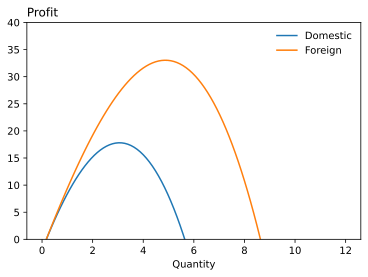

In [5]:
#@title **Graph of Profit Function** { display-mode: "form" }
labels = ['Domestic', 'Foreign']
qs = jnp.linspace(0, 12, 100)                             # Vector of quantities 
for j in [0, 1]:
  profit_fn_j = partial(profit, foreign=j)
  vector_profit_fn = jax.vmap(profit_fn_j)                # Vectorize the profit function
  ps = vector_profit_fn(qs)                               # Vector of profits 
  plt.plot(qs, ps, label=labels[j])                       # Plot the graph 
plt.title('Profit', loc='left')                           # Title
plt.xlabel('Quantity')                                    # Lable the X-axis
plt.ylim(0., 40.)                                         # Restrict graph to non-negative profit
plt.legend(frameon=False)                                 # Show labels of graphs
plt.show()                                                # Show the graph

In [6]:
#@title **Uncertainty** { display-mode: "form" }
def output_fn(key, q_bar, foreign):
  """
  - Key allows us to sample in a reproduceable way 
  - q_bar is the expected output 
  - l is a binary variable that indicates whether the production is in the U.S. or foreign
  """
  q = q_bar + jax.random.normal(key)*foreign                      
  return jnp.maximum(q, 0.0)                             # Ensure that the output is positive


def expected_profit(key, q_bar, foreign):
  output_fn_partial = partial(output_fn, q_bar=q_bar, foreign=foreign)          # Construct Random Variable 
  q_samples = jax.vmap(output_fn_partial)(jax.random.split(key, 1000))          # samples 
  profits = jax.vmap(profit)(q_samples)
  return jnp.mean(profits)

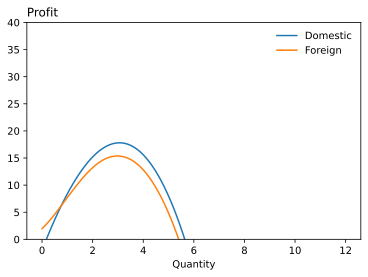

In [7]:
#@title **Graph of Profit Function** { display-mode: "form" }
labels = ['Domestic', 'Foreign']
qs = jnp.linspace(0, 12, 100)                                                   # Vector of quantities 
for j in [0, 1]:                                                                # Loop over domestic & foreign production
  profit_fn_j = partial(expected_profit, jax.random.PRNGKey(0), foreign=j)      # Partially evaluate expected profit function
  vector_profit_fn = jax.vmap(profit_fn_j)                                      # Vectorize the partially evaluated expected profit function
  ps = vector_profit_fn(qs)                                                     # Vector of expected profits 
  plt.plot(qs, ps, label=labels[j])                                             # Plot the graph 
plt.title('Profit', loc='left')                                                 # Title
plt.xlabel('Quantity')                                                          # Label the X-axis
plt.ylim(0., 40.)                                                               # Restrict graph to non-negative profit
plt.legend(frameon=False)                                                       # Show labels of graphs
plt.show()                                                                      # Show the graph